In [1]:
import pandas as np
import numpy as np1 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics

In [2]:
def normalize(data, cat) :
    data[cat]= ((data[cat]-data[cat].min())/ (data[cat].max()-data[cat].min()))

In [3]:
df = np.read_csv('education.csv')
df_1= np.read_csv('educnorma.csv',index_col=0)

In [4]:
#remarque : les éléves qui arrivent à participer activement en ligne et qui arrive à se renseigner avec  

In [5]:
y = df["Performance in online"].copy()

for i in range (len(y)):
    if y[i] < 7: y[i]= 0
    else : y[i]=1

df_1.drop(["performance_online"],axis=1,inplace=True)

In [6]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [7]:
import math
from random import seed, shuffle
SEED = 1122334455
seed(SEED)
np1.random.seed(SEED)


def reapeated_random(n_iter,df_1) :
    X = df_1.to_numpy(copy=True)
    y1 = y.to_numpy(copy=True)   
    matrise_result=[] # dim 1 -> interation 
                     # dim 2 -> 0: training ; 1:testing ; 2:validation
                     # dim 3 -> c1,c2,c3,c4,c5
    C_i=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]
    C_range=np1.shape(C_i)[0]
    
    n_size=np1.shape(X)[0]
    perm = list(range(0,n_size))
    shuffle(perm)
    X_syn1 = X[perm]
    y_syn1 = y[perm]
    #Generate training, testing and validation:
    n_train=int(0.5*n_size)
    n = np1.shape(X_syn1)[0]
    X_syn_training=X_syn1[0:n_train,:]
    y_syn_training=y_syn1[0:n_train]

    X_syn_testing=X_syn1[n_train:(n_train+math.floor((n-n_train)/2)),:]
    y_syn_testing=y_syn1[n_train:(n_train+math.floor((n-n_train)/2))]

    X_syn_validation=X_syn1[(n_train+math.floor((n-n_train)/2)):n,:]
    y_syn_validation=y_syn1[(n_train+math.floor((n-n_train)/2)):n]

        #resolution
    Accuracy_training=np1.empty([C_range])
    Accuracy_testing=np1.empty([C_range])
    Accuracy_validation=np1.empty([C_range])
    for i in range(C_range):
        print(i)
    
        svm_clf = SVC(kernel="linear", C=C_i[i])
        svm_clf.fit(X_syn_training, y_syn_training)
  
        y_pred_training=svm_clf.predict(X_syn_training)
        y_pred_testing=svm_clf.predict(X_syn_testing)
        y_pred_validation=svm_clf.predict(X_syn_validation)

        Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
        Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
        Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)   
        
    matrise_result += [[Accuracy_training,Accuracy_testing,Accuracy_validation]]
    return matrise_result


In [8]:
df_1.drop([ "nb_subjets" , "Sleep", "Note_avant","Home_location_Urban","Education_Post Graduate","Education_School" \
           ,"Education_Under Graduate","Economic_status_Middle Class","Economic_status_Poor","Economic_status_Rich", \
           "Sport_Yes", "Gaming_Yes","interest_Both"],axis=1,inplace=True)
df_1.drop(["group_study_yes","separate_room_Yes","Monitoring_Yes","Gender_Male", "Family_size", "Media","Device_used_Laptop" \
           ,"Device_used_Mobile","interest_Practical","interest_Theory","Device_used_Desktop"],axis=1,inplace=True)
#df_1.drop(["Age","Study","Satisfaction_online_Average"],axis=1,inplace=True)

In [9]:
matrice = np1.array(reapeated_random(10,df_1))

0
1
2
3
4
5
6
7
8
9
10
11


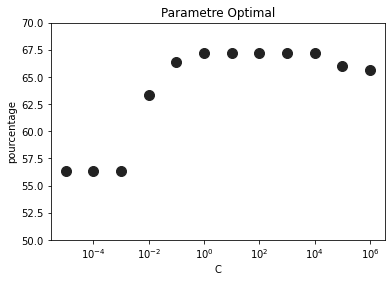

In [10]:
liste_C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]
liste_précision = matrice[0][2]

fig = plt.figure(figsize=(6,4))
plt.scatter(
    liste_C, matrice[0][2], color='#222222', marker='o', s = 100
)

plt.xscale("log")
plt.xlabel("C") ; plt.ylabel("pourcentage") ;plt.title("Parametre Optimal")
plt.ylim(50,70) 
plt.show()